In [46]:
import os
os.chdir('/home/soham/Desktop/GitHub/BTP/')

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import re

import warnings
warnings.filterwarnings('ignore')

## LDA with 112 & 121

In [47]:
all_data = pd.read_excel('data/mixture/8 solutions/total_new_data(8 mixtures).xlsx')

true_labels = all_data['Label']
labels = true_labels.map({'Mix_101': 0, 'A1': 1, 'A2': 2, 'A3': 3, 'Mix_111':4, 'Mix_121':5, 'Mix_211':6, 'Mix_112':7})

all_data = all_data.drop(['Dilution','Label'], axis=1)

lda = LDA(n_components=2)
lda_data = lda.fit_transform(all_data, labels)

lda_data = pd.DataFrame(lda_data, columns=['LD1', 'LD2'])
lda_data.head(2)

,LD1,LD2
0,4.028489,-0.112134
1,4.394760,-0.333785


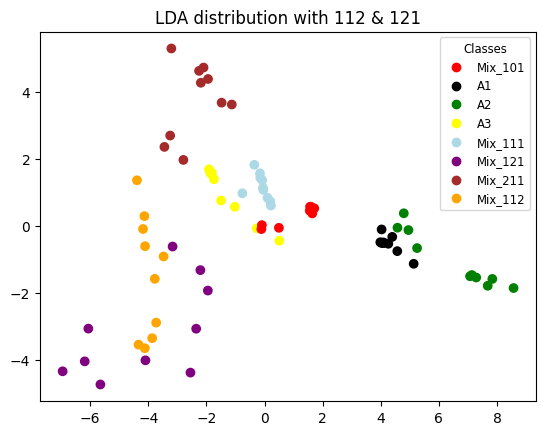

In [48]:
from matplotlib.colors import ListedColormap
label_mapping = {0:'Mix_101', 1:'A1',2: 'A2',3: 'A3', 4:'Mix_111', 5:'Mix_121', 6:'Mix_211', 7:'Mix_112'}

colors = ['red', 'black', 'green', 'yellow', 'lightblue', 'purple', 'brown', 'orange']
scatter = plt.scatter(lda_data['LD1'], lda_data['LD2'], c=labels, cmap=ListedColormap(colors))

handles, labels = scatter.legend_elements()
labels = [label_mapping[int(re.search(r'\d+', str(label)).group())] for label in labels]
plt.legend(handles, labels, title="Classes", fontsize='small', title_fontsize='small')

plt.title('LDA distribution with 112 & 121')
plt.show()

In [49]:
lda_data['Labels'] = true_labels
lda_data.to_excel('data/mixture/8 solutions/LDA_with_112_121.xlsx', index=False)
lda_data.head()

,LD1,LD2,Labels
0,4.028489,-0.112134,A1
1,4.394760,-0.333785,A1
2,3.983606,-0.493548,A1
3,4.028883,-0.515631,A1
4,4.064155,-0.511202,A1


## LDA without 112 & 121

In [50]:
all_data = pd.read_excel('data/mixture/8 solutions/total_new_data(8 mixtures).xlsx')

# Dropping the data of Mixture_112 & Mixture_121

all_data = all_data[all_data['Label']!='Mix_112'][all_data['Label']!='Mix_121'].reset_index(drop=True)

true_labels = all_data['Label']
labels = true_labels.map({'Mix_101': 0, 'A1': 1, 'A2': 2, 'A3': 3, 'Mix_111':4, 'Mix_211':5})

all_data = all_data.drop(['Dilution','Label'], axis=1)

lda = LDA(n_components=2)
lda_data = lda.fit_transform(all_data, labels)

lda_data = pd.DataFrame(lda_data, columns=['PC1', 'PC2'])
lda_data.head(2)

,PC1,PC2
0,-3.567703,1.872287
1,-3.893028,1.174235


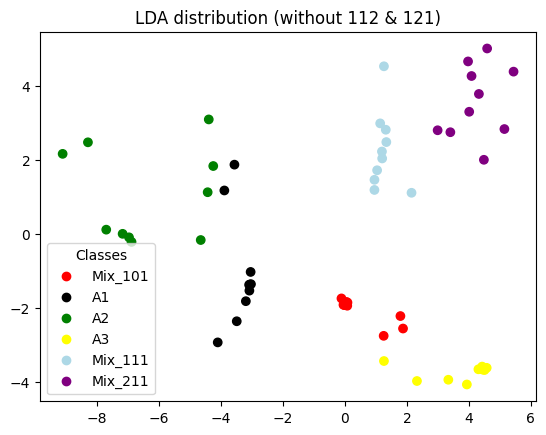

In [51]:
label_mapping = {0:'Mix_101', 1:'A1',2: 'A2',3: 'A3', 4:'Mix_111', 5:'Mix_211'}

colors = ['red', 'black', 'green', 'yellow', 'lightblue', 'purple']
scatter = plt.scatter(lda_data['PC1'], lda_data['PC2'], c=labels, cmap=ListedColormap(colors))

handles, labels = scatter.legend_elements()
labels = [label_mapping[int(re.search(r'\d+', str(label)).group())] for label in labels]
plt.legend(handles, labels, title="Classes")

plt.title('LDA distribution (without 112 & 121)')
plt.show()

In [52]:
lda_data['Labels'] = true_labels
lda_data.to_excel('data/mixture/8 solutions/LDA_without_112_121.xlsx', index=False)
lda_data.head()

,PC1,PC2,Labels
0,-3.567703,1.872287,A1
1,-3.893028,1.174235,A1
2,-3.044961,-1.028632,A1
3,-3.034251,-1.358815,A1
4,-3.069544,-1.368600,A1
